In [1]:
%matplotlib inline
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

In [2]:
with zipfile.ZipFile("apartment-rental-offers-in-germany.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

df = pd.read_csv("data/immo_data.csv")
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [29]:
df = pd.read_csv("data/immo_data.csv") 
print(df.shape)
print(df.head())

(268850, 49)
                regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  

In [4]:
df.shape        
df.columns      
df.info()       
df.describe()   
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructed              57045
yearConstructedRange         57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
scoutId                          0
hasKitchen          

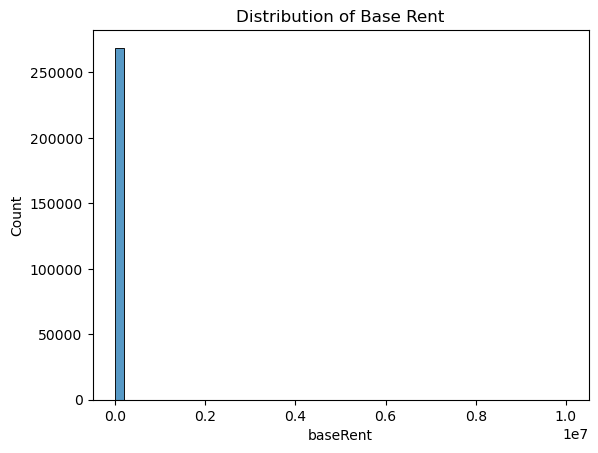

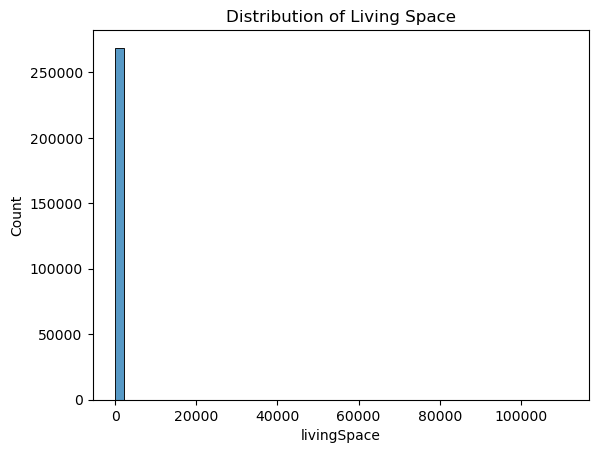

In [5]:
sns.histplot(df['baseRent'].dropna(), bins=50)
plt.title("Distribution of Base Rent")
plt.show()

sns.histplot(df['livingSpace'].dropna(), bins=50)
plt.title("Distribution of Living Space")
plt.show()

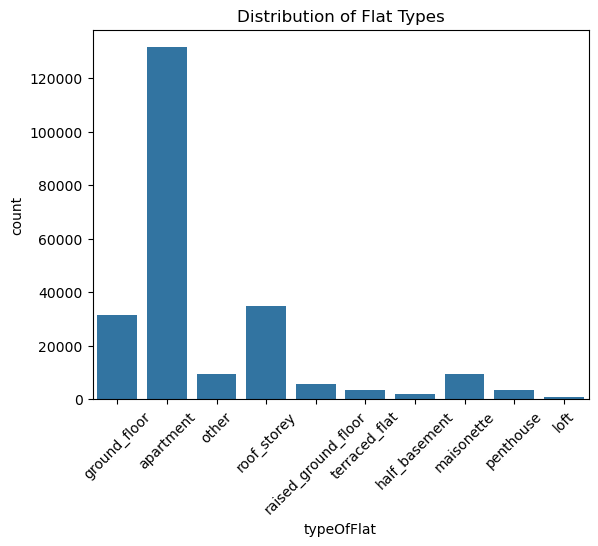

In [6]:
sns.countplot(x='typeOfFlat', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Flat Types")
plt.show()

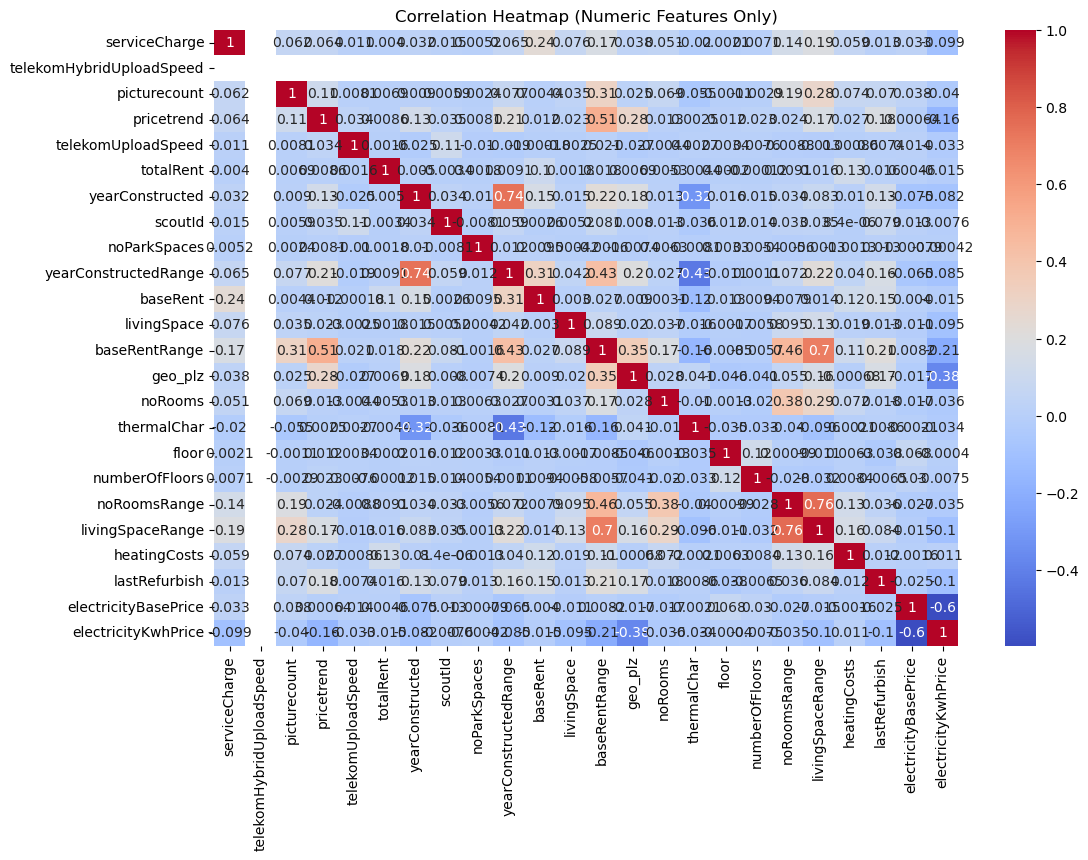

baseRent                    1.000000
yearConstructedRange        0.311064
serviceCharge               0.236240
yearConstructed             0.152298
lastRefurbish               0.148990
heatingCosts                0.118453
totalRent                   0.101741
baseRentRange               0.027437
livingSpaceRange            0.013863
floor                       0.012608
pricetrend                  0.012010
noParkSpaces                0.009466
numberOfFloors              0.009436
geo_plz                     0.009038
noRoomsRange                0.007895
picturecount                0.004449
electricityBasePrice        0.004010
noRooms                     0.003109
livingSpace                 0.002992
scoutId                     0.002583
telekomUploadSpeed         -0.000183
electricityKwhPrice        -0.014725
thermalChar                -0.122391
telekomHybridUploadSpeed         NaN
Name: baseRent, dtype: float64

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()
df.select_dtypes(include=['float64','int64']).corr()['baseRent'].sort_values(ascending=False)

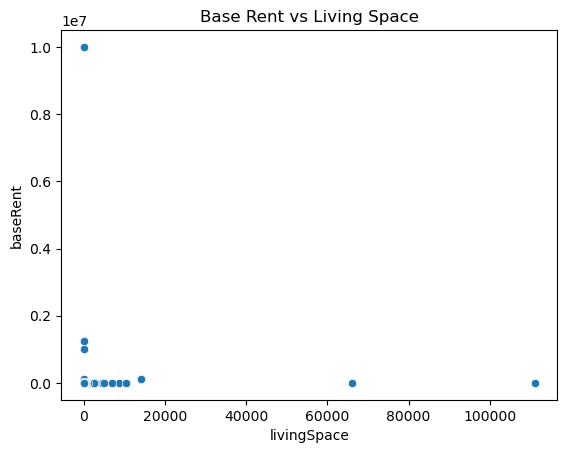

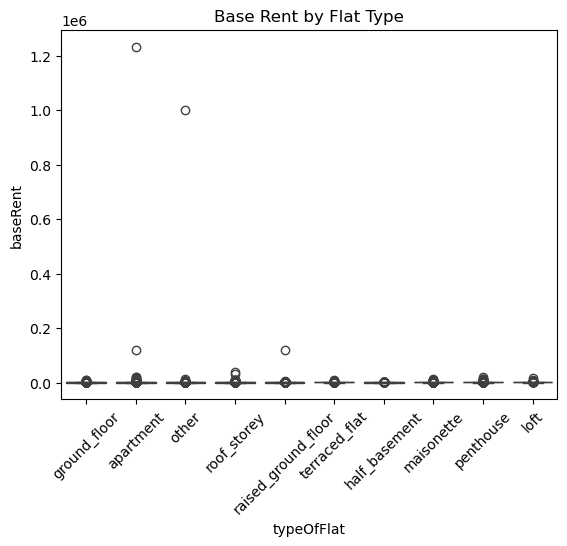

In [8]:
sns.scatterplot(x='livingSpace', y='baseRent', data=df)
plt.title("Base Rent vs Living Space")
plt.show()

sns.boxplot(x='typeOfFlat', y='baseRent', data=df)
plt.xticks(rotation=45)
plt.title("Base Rent by Flat Type")
plt.show()

In [9]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructed              57045
yearConstructedRange         57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
dtype: int64

In [10]:
df.drop(columns=[
    'telekomHybridUploadSpeed','electricityBasePrice','electricityKwhPrice',
    'energyEfficiencyClass','lastRefurbish','firingTypes','facilities',
    'houseNumber','streetPlain','description','telekomUploadSpeed',
    'telekomTvOffer','pricetrend','yearConstructedRange','totalRent'
], inplace=True, errors='ignore')

In [11]:
df['heatingCosts'] = df['heatingCosts'].fillna(0)
df['noParkSpaces'] = df['noParkSpaces'].fillna(0)
df['yearConstructed'] = df['yearConstructed'].fillna(df['yearConstructed'].median())
df['floor'] = df['floor'].fillna(df['floor'].median())
df['thermalChar'] = df['thermalChar'].fillna(df['thermalChar'].median())
df['numberOfFloors'] = df['numberOfFloors'].fillna(df['numberOfFloors'].median())
df['serviceCharge'] = df['serviceCharge'].fillna(0)
df['typeOfFlat'] = df['typeOfFlat'].fillna('Unknown')
df['heatingType'] = df['heatingType'].fillna('Unknown')
df['petsAllowed'] = df['petsAllowed'].fillna('Unknown')
df['interiorQual'] = df['interiorQual'].fillna(df['interiorQual'].mode()[0])
df['condition'] = df['condition'].fillna('Unknown')

In [12]:
df.isnull().sum().sort_values(ascending=False)

regio1              0
serviceCharge       0
heatingType         0
newlyConst          0
balcony             0
picturecount        0
yearConstructed     0
scoutId             0
noParkSpaces        0
hasKitchen          0
geo_bln             0
cellar              0
baseRent            0
livingSpace         0
geo_krs             0
condition           0
interiorQual        0
petsAllowed         0
street              0
lift                0
baseRentRange       0
typeOfFlat          0
geo_plz             0
noRooms             0
thermalChar         0
floor               0
numberOfFloors      0
noRoomsRange        0
garden              0
livingSpaceRange    0
regio2              0
regio3              0
heatingCosts        0
date                0
dtype: int64

In [13]:
categorical_cols = ['typeOfFlat','condition','interiorQual','heatingType','petsAllowed']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

for col in ['regio1','regio2','regio3','geo_bln','geo_krs','geo_plz']:
    if col in df_encoded.columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [14]:
X = df_encoded.drop('baseRent', axis=1)
y = df_encoded['baseRent']

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)          
y_pred_lr = lr.predict(X_test)    

In [17]:
mse = mean_squared_error(y_test, y_pred_lr)   
rmse = np.sqrt(mse)                           
print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 1090.1297032375537
Linear Regression R²: -3.35987264560851


In [18]:
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, None]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=2,   
    cv=2,       
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

sample_X = X_train.sample(5000, random_state=42)
sample_y = y_train.loc[sample_X.index]

random_search.fit(sample_X, sample_y)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Params: {'n_estimators': 100, 'max_depth': None}
Best Score: 0.9126586351522461


In [19]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [20]:
best_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        max_features='sqrt',
        random_state=42,
        verbose=1
    ))
])

best_rf_pipeline.fit(X_train, y_train)

y_pred = best_rf_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final Random Forest RMSE:", rmse)
print("Final Random Forest R²:", r2)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s


Final Random Forest RMSE: 3314.8097085044046
Final Random Forest R²: -39.3120293296467


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


In [21]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

best_rf_pipeline.fit(X_train, y_train_log)
y_pred_log = best_rf_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2 = r2_score(y_test_log, y_pred_log)

print("Random Forest RMSE (log target):", rmse)
print("Random Forest R² (log target):", r2)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s


Random Forest RMSE (log target): 0.14368009679158308
Random Forest R² (log target): 0.9452182266663227


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_pred = best_rf_pipeline.predict(X_test)
print("First 10 predictions:", y_pred[:10])
print("First 10 actuals:", y_test[:10].values)

categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

for col in categorical_cols[:5]: 
    print(f"{col} train unique:", X_train[col].unique()[:10])
    print(f"{col} test unique:", X_test[col].unique()[:10])

(215080, 67) (215080,)
(53770, 67) (53770,)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s


First 10 predictions: [5.50520268 7.28819716 6.1171333  7.29169279 6.9468554  7.94155293
 6.63046347 5.34588346 6.7558722  6.8701131 ]
First 10 actuals: [ 200.   1616.    460.   1440.   1195.   3180.    790.    195.93  875.
  980.  ]
Categorical columns: Index([], dtype='object')


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished


In [32]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

best_rf_pipeline.fit(X_train, y_train_log)

y_pred_log = best_rf_pipeline.predict(X_test)

y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final Random Forest RMSE:", rmse)
print("Final Random Forest R²:", r2)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s


Final Random Forest RMSE: 188.57244662375896
Final Random Forest R²: 0.869541035001393


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished


In [33]:
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)
y_pred_lin = linreg_pipeline.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

best_rf_pipeline.fit(X_train, y_train_log)
y_pred_log = best_rf_pipeline.predict(X_test)
y_pred_rf = np.expm1(y_pred_log)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest (log target)'],
    'RMSE': [rmse_lin, rmse_rf],
    'R²': [r2_lin, r2_rf]
})

print(results)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s


                        Model         RMSE        R²
0           Linear Regression  1090.129703 -3.359873
1  Random Forest (log target)   188.572447  0.869541


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


In [34]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb_pipeline.fit(X_train, np.log1p(y_train))
y_pred_xgb_log = xgb_pipeline.predict(X_test)
y_pred_xgb = np.expm1(y_pred_xgb_log)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R²:", r2_xgb)


XGBoost RMSE: 171.08661730764058
XGBoost R²: 0.8926135374881182


In [35]:
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
linreg_pipeline.fit(X_train, y_train)
y_pred_lin = linreg_pipeline.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
best_rf_pipeline.fit(X_train, y_train_log)
y_pred_rf_log = best_rf_pipeline.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

xgb_pipeline.fit(X_train, y_train_log)
y_pred_xgb_log = xgb_pipeline.predict(X_test)
y_pred_xgb = np.expm1(y_pred_xgb_log)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest (log target)', 'XGBoost (log target)'],
    'RMSE': [rmse_lin, rmse_rf, rmse_xgb],
    'R²': [r2_lin, r2_rf, r2_xgb]
})

print(results)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


                        Model         RMSE        R²
0           Linear Regression  1090.129703 -3.359873
1  Random Forest (log target)   188.572447  0.869541
2        XGBoost (log target)   171.086617  0.892614


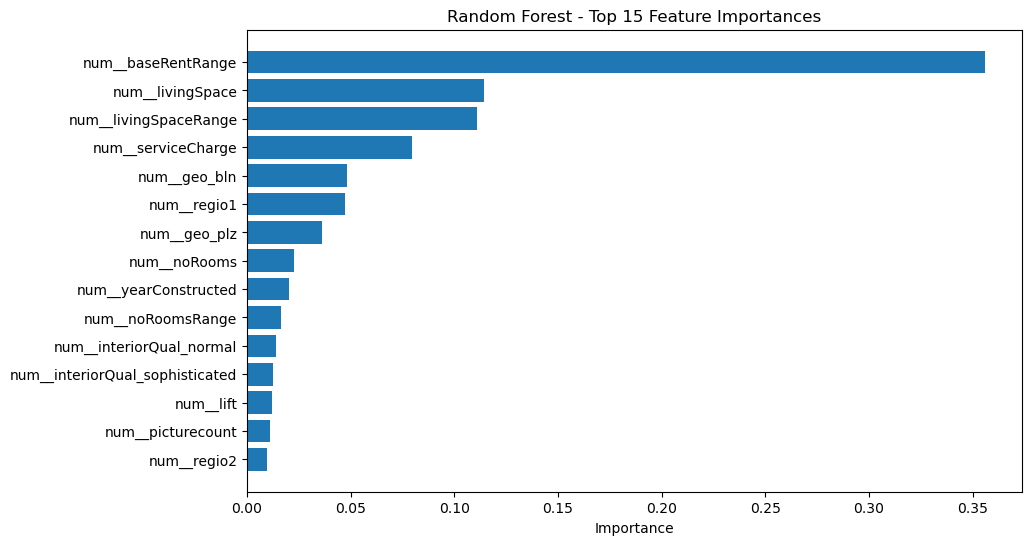

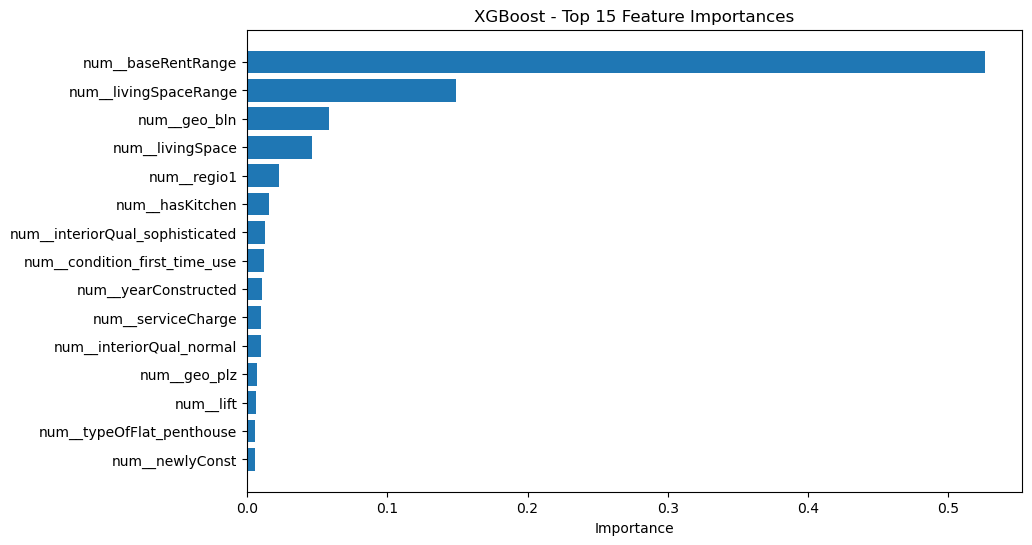

In [36]:
rf_model = best_rf_pipeline.named_steps['model']
rf_importances = rf_model.feature_importances_

feature_names = best_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

rf_feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_feat_imp['Feature'][:15][::-1], rf_feat_imp['Importance'][:15][::-1])
plt.title("Random Forest - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()

xgb_model = xgb_pipeline.named_steps['model']
xgb_importances = xgb_model.feature_importances_

xgb_feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(xgb_feat_imp['Feature'][:15][::-1], xgb_feat_imp['Importance'][:15][::-1])
plt.title("XGBoost - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()

In [37]:
scores_rf = cross_val_score(best_rf_pipeline, X_train, np.log1p(y_train),
                            cv=3, scoring='r2', n_jobs=-1)
print("Random Forest CV R²:", scores_rf.mean(), "±", scores_rf.std())

scores_xgb = cross_val_score(xgb_pipeline, X_train, np.log1p(y_train),
                             cv=3, scoring='r2', n_jobs=-1)
print("XGBoost CV R²:", scores_xgb.mean(), "±", scores_xgb.std())


Random Forest CV R²: 0.9410261547830906 ± 0.0027870786777039152
XGBoost CV R²: 0.9527464208387456 ± 0.0013842269374637506
